In [2]:
using Distributions, PyPlot, kNN

INFO: Precompiling module DataFrames...


LoadError: LoadError: LoadError: ArgumentError: Stats not found in path
while loading /Users/vishalgupta/.julia/v0.4/kNN/src/kNN.jl, in expression starting on line 6
while loading In[2], in expression starting on line 1

In [2]:
#the decision rule as a fcn of beta
function q_beta(cs, rs, beta)
    ratios = (beta + rs) ./ cs
    indx = sortperm(ratios, rev=true)
    out = zeros(Float64, length(indx))
    weight = 0.
    for ix = 1:length(indx)
        #check if next item fits
        if weight + cs[indx[ix]] <= 1
            out[[indx[ix]]] = 1.
            weight += cs[indx[ix]]
        else
            #take fractional part
            out[[indx[ix]]] = (1-weight)/cs[indx[ix]]
            break
        end
    end
    out
end

q_beta (generic function with 1 method)

In [16]:
n=1000
beta = 2
alpha = 1
thetas = rand(Gamma(alpha, 1/beta), n)  #Julia uses other parameterization
cs = rand(n)/n * 4
rs = [rand(Exponential(1/thetas[ix])) for ix = 1:length(thetas)]
ts = [rand(Exponential(1/thetas[ix])) for ix = 1:length(thetas)]
med = (beta + rs)/alpha;

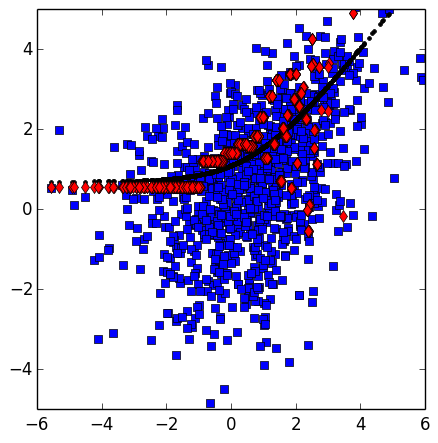

(-5,5)

In [57]:
fits = constant_fit(rs, ts, rs, .4, false)

figure(figsize=(5,5))
plot(log(rs), log(ts), "sb")
plot(log(rs), log(med), ".k")
plot(log(rs), log(fits), "dr")

xlim(-6, 6)
ylim(-5, 5)

In [47]:
#fits a piecewise constant function over intervals of length delta
function constant_fit(rs, ts, pt::Real, delta)
    lower = floor(pt/delta)
    upper = lower + delta
    inds = (rs .>= lower) & (rs .<= upper)
    val = mean(ts[inds])   
end
function constant_fit(rs, ts, pts, delta, useExpGrid)
    if useExpGrid
        return exp(constant_fit(log(rs), log(ts), log(pts), delta, false))
    end
    [constant_fit(rs, ts, pts[ix], delta, useExpGrid) for ix = 1:length(pts)]
end

constant_fit (generic function with 3 methods)